In [28]:
%load_ext autoreload
%autoreload 2

In [57]:
from skimage.draw import circle
from skimage.draw import circle_perimeter
from skimage.draw import circle_perimeter_aa
import matplotlib.pyplot as plt
import phantoms
import numpy as np

from skimage.transform import PiecewiseAffineTransform, warp
from skimage import data

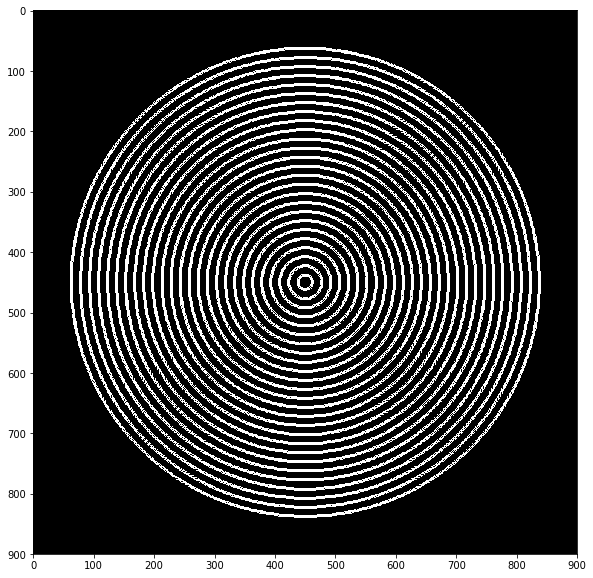

In [149]:
def add_circle(img, x, y, radius):
    rr, cc = circle_perimeter(x, y, radius, shape=img.shape)
    img[rr, cc] = 250

img = np.zeros((900, 900), dtype=np.uint8)


for i in range(10, 400, 15):
    add_circle(img, 450, 450, i)
    add_circle(img, 450, 450, i+1)
    add_circle(img, 450, 450, i+2)
    add_circle(img, 450, 450, i+3)
    add_circle(img, 450, 450, i+4)


plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.show()

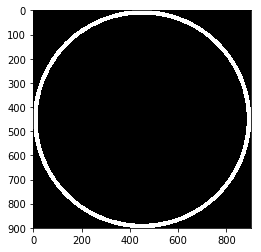

In [32]:
plt.imshow(phantoms.circle(900), cmap='gray')

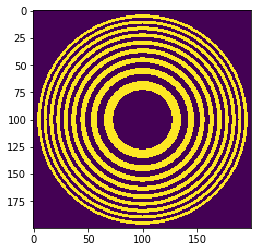

In [51]:
xx, yy = np.mgrid[:200, :200]
# circles contains the squared distance to the (100, 100) point
# we are just using the circle equation learnt at school
circle = (xx - 100) ** 2 + (yy - 100) ** 2
# donuts contains 1's and 0's organized in a donut shape
# you apply 2 thresholds on circle to define the shape
img = np.zeros((200,200))
for i in range(1, 10):
    img = img + np.logical_and(circle < 1000*i + 256, circle > (1000*i - 256))
plt.imshow(img)

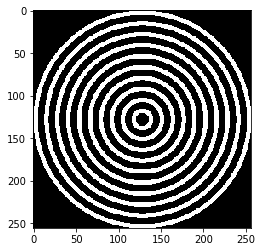

In [65]:
plt.imshow(phantoms.circle(256, 10), cmap='gray')

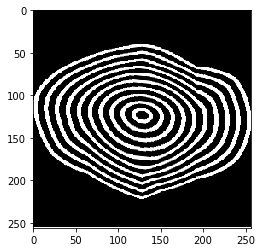

Warp from red to blue


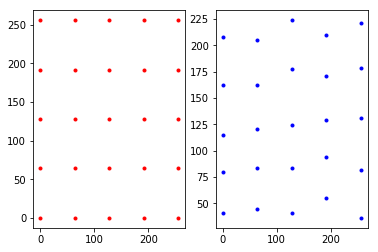

In [210]:
image = phantoms.circle(256, 10)
rows, cols = image.shape[0], image.shape[1]

src_cols = np.linspace(0, cols, 5)
src_rows = np.linspace(0, rows, 5)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

# add sinusoidal oscillation to row coordinates
#dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 10

#dst_rows = src[:, 1] - np.sin(np.linspace(0, 2 * np.pi, src.shape[0])) * 10
dst_rows = src[:, 1] - (0.5*np.random.randn(src.shape[0]) - 0.5) * 15


dst_cols = src[:, 0]

dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T


tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

out_rows = image.shape[0]
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))

fig, ax = plt.subplots()
ax.imshow(out, cmap='gray')
#ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
ax.axis((0, out_cols, out_rows, 0))
plt.show()


print("Warp from red to blue")
plt.subplot(121)
plt.plot(src[:,0], src[:,1], '.r')
plt.subplot(122)
plt.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')

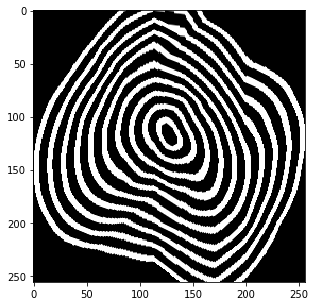

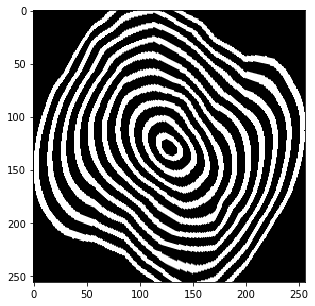

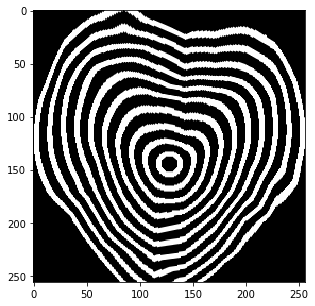

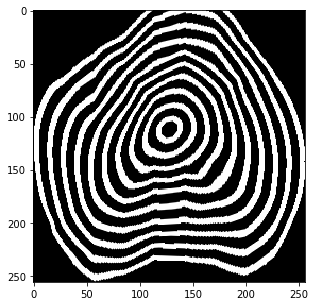

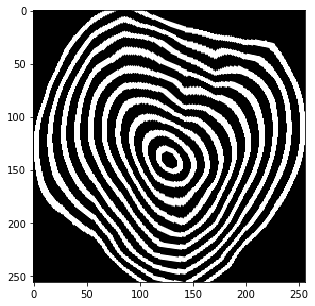

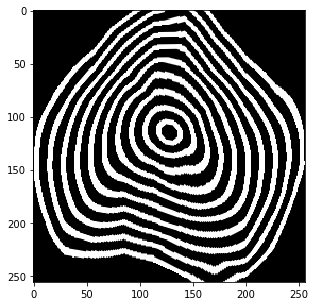

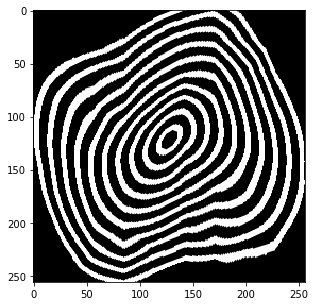

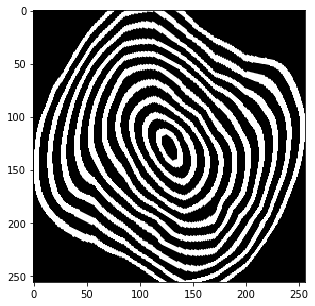

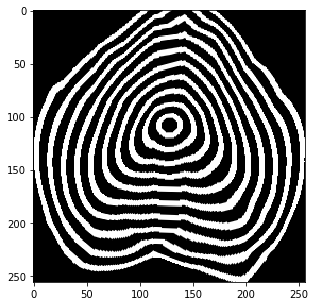

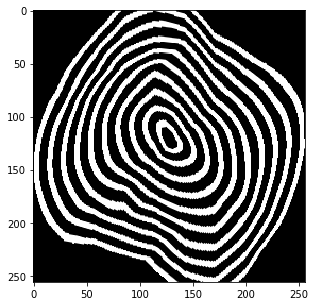

In [211]:
for _ in range(10):
    wobbly, src, inv_src = phantoms.wobbly_transform(phantoms.circle(256,10))
    plt.figure(figsize=(5,5))
    plt.imshow(wobbly, cmap='gray')
    plt.show()

In [204]:
np.random.rand()

0.38018328147094815